## Import modules

In [1]:
import scanpy as sc
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import os 
from matplotlib.patches import Rectangle
import itertools

import post_cpdb

In [2]:
import session_info
session_info.show()

## Prepare functions

In [3]:
def revise_labels(cpdbouts):
    
    for old, new in {
                        'FB4':'FB4_activated',
                        'vCM3':'vCM3_stressed',
                        'NC1':'NC1_glial',
                        'NC2':'NC2_glial_NGF+',
                        'NC3':'NC3_glial',
                        'NC4':'NC4_glial',
                        'NC5':'NC5_glial',
                        'NC6':'NC6_schwann',
                        'EC7_atria':'EC7_endocardial'
                    }.items():
        cpdbouts.columns = [x.replace(old,new) for x in cpdbouts.columns]
    
    return cpdbouts

## Plot

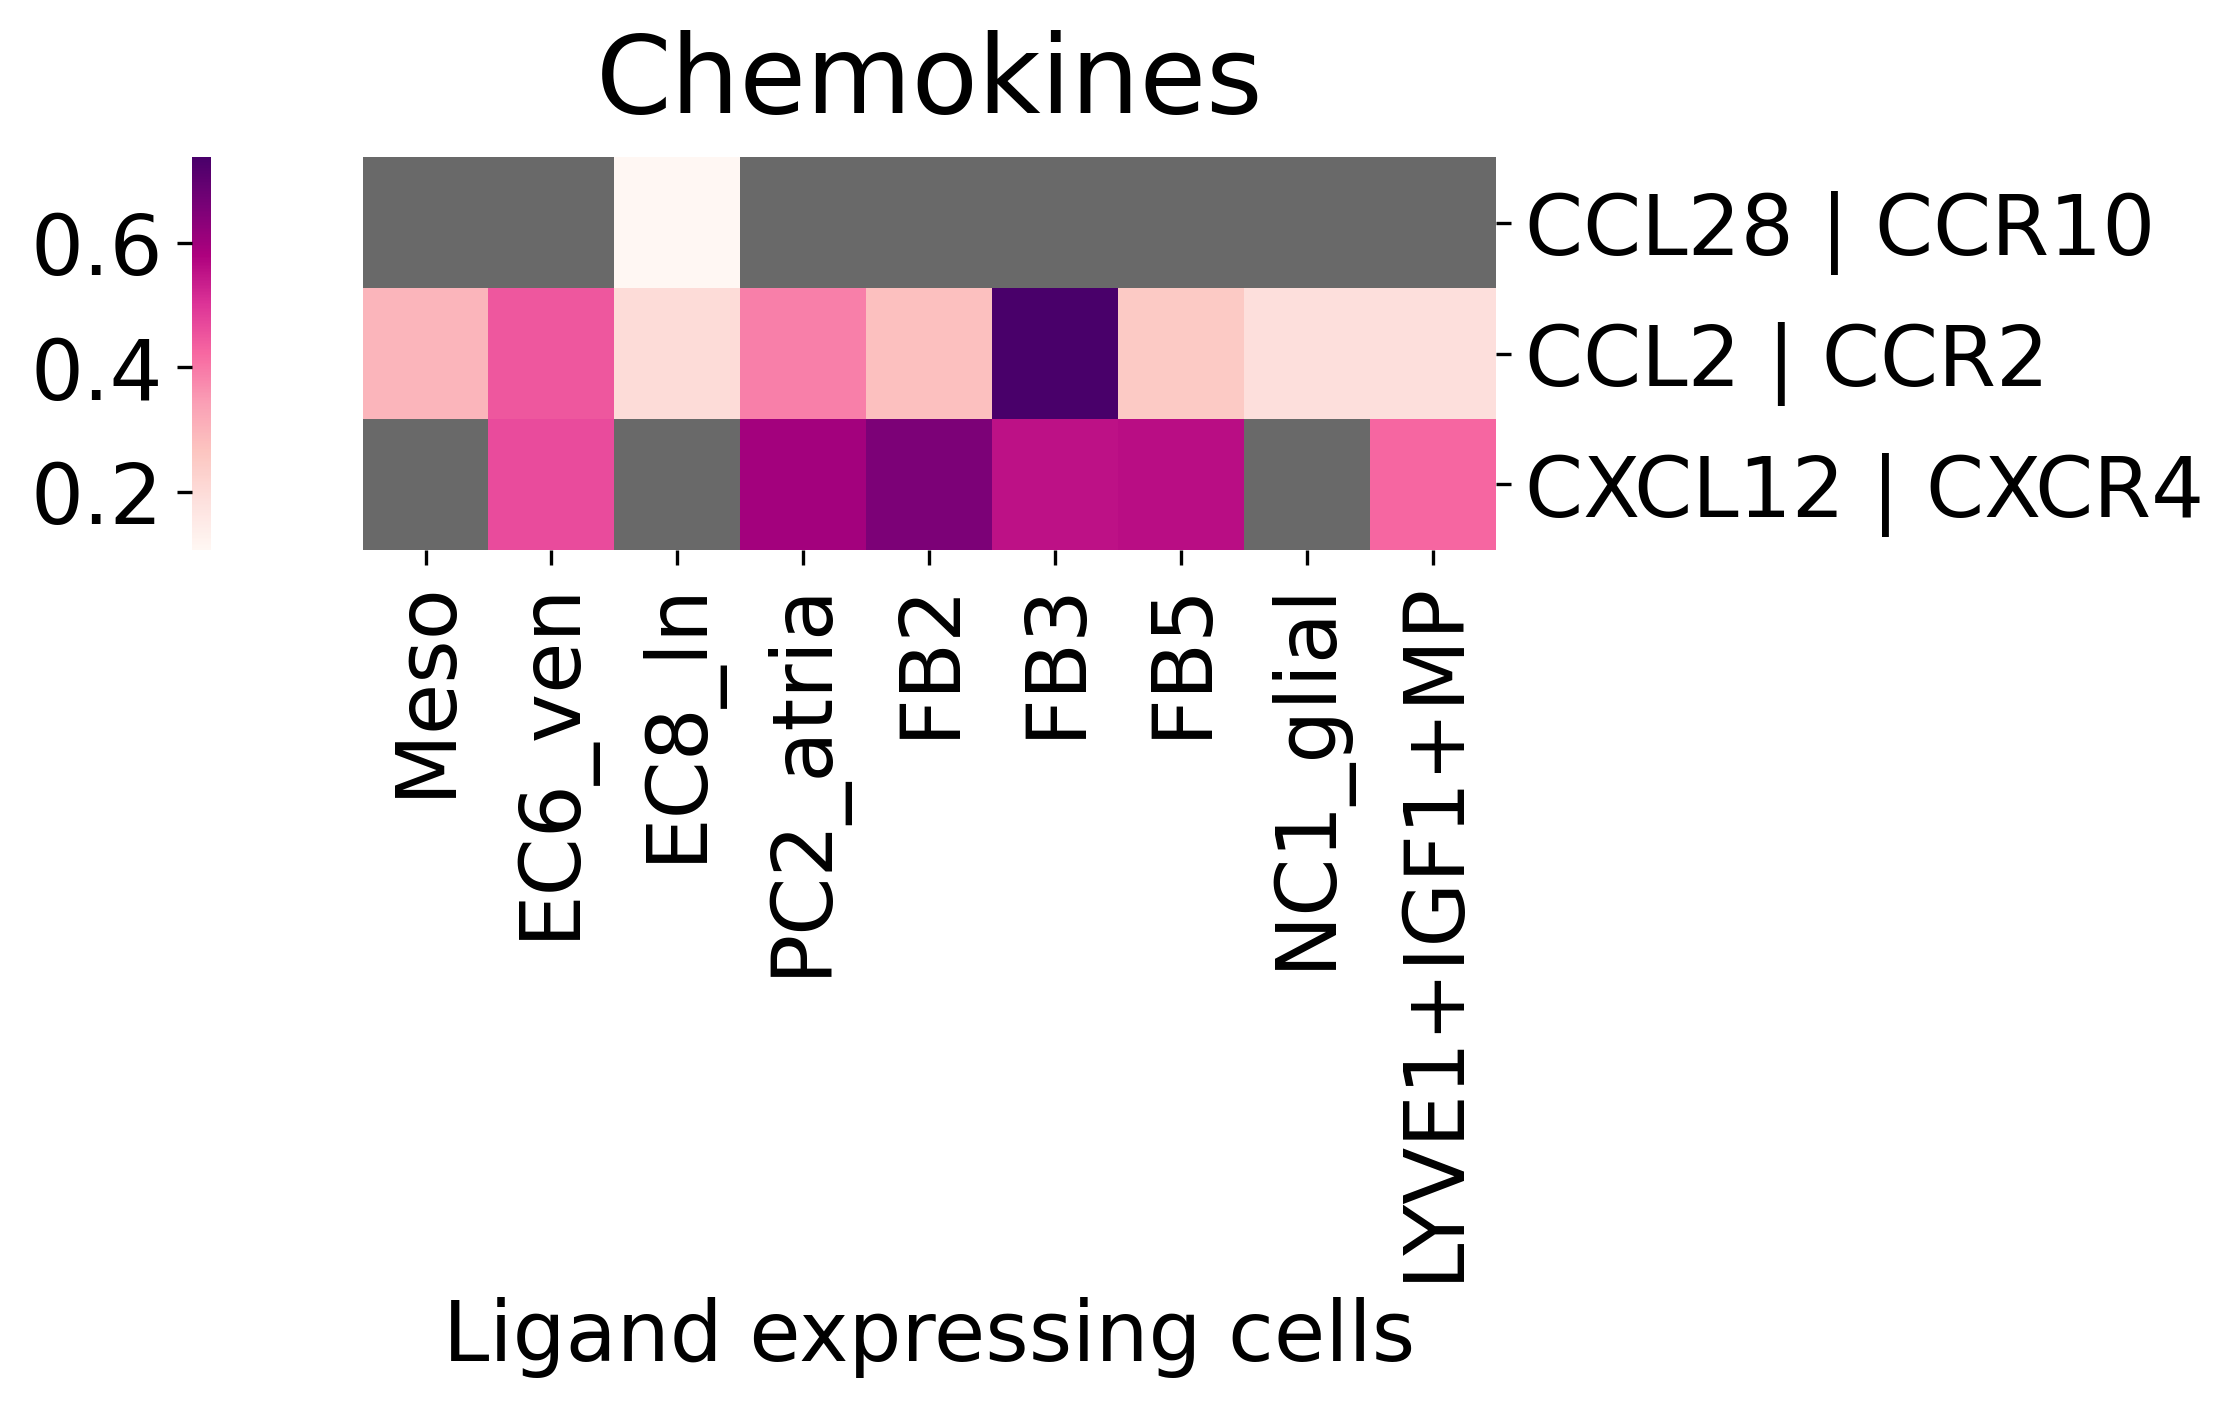

In [8]:
# select only CCR2 for CCL2 receptor
# select only CCL2 for CCR2 ligand
# so ignore ['CCL2_CCR10','CCL2_ACKR1', 'ACKR2_CCL2',
#            'CCR2_CCL11','CCR2_CCL13','CCR2_CCL26','CCL24_CCR2','CCL16_CCR2', 'CCR2_CCL7','CCR2_CCL8']

path_to_cpdb = '/nfs/team205/heart/cellphonedb/archive/ver20220524/RV_Bplasma-vs-allothers_Epicardium_0.05'

cpdbout_means = revise_labels(pd.read_table(f'{path_to_cpdb}/significant_means.txt',index_col=0))
cpdbout_means = cpdbout_means[cpdbout_means['interacting_pair'].isin(['CCL2_CCR10','CCL2_ACKR1', 'ACKR2_CCL2',
                                                                      'CCR2_CCL11','CCR2_CCL13','CCR2_CCL26',
                                                                      'CCL24_CCR2','CCL16_CCR2', 'CCR2_CCL7','CCR2_CCL8'])==False]
post_cpdb.plot_CCI(cpdbout_means = cpdbout_means,
         target_celltype = 'B_plasma',
         ligand_or_receptor = 'receptor',
         cpdbout_pvals = None,
         pvelue_thresh = None,
         mean_thresh = 0,
         category_column = ['is_ChemokineR'],
         interaction_metadata = pd.read_csv('/nfs/team205/heart/custom_cellphone/interaction_meta/interaction_metadata.csv'),
         microenvcells_to_plot = ['Meso','EC6_ven', 'EC8_ln','PC2_atria',  
                                           'FB2', 'FB3','FB5', 'NC1_glial', 'LYVE1+IGF1+MP','B_plasma'],
         remove_autocrine = True,
         fig_width=6.5,
             fig_hight=1.7,
         title='Chemokines',
         title_fontsize=26,
         title_hight=1.05
        )
plt.savefig('/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/figures/CCI_RV_Chemokine-toBplasma.pdf',
           bbox_inches='tight')

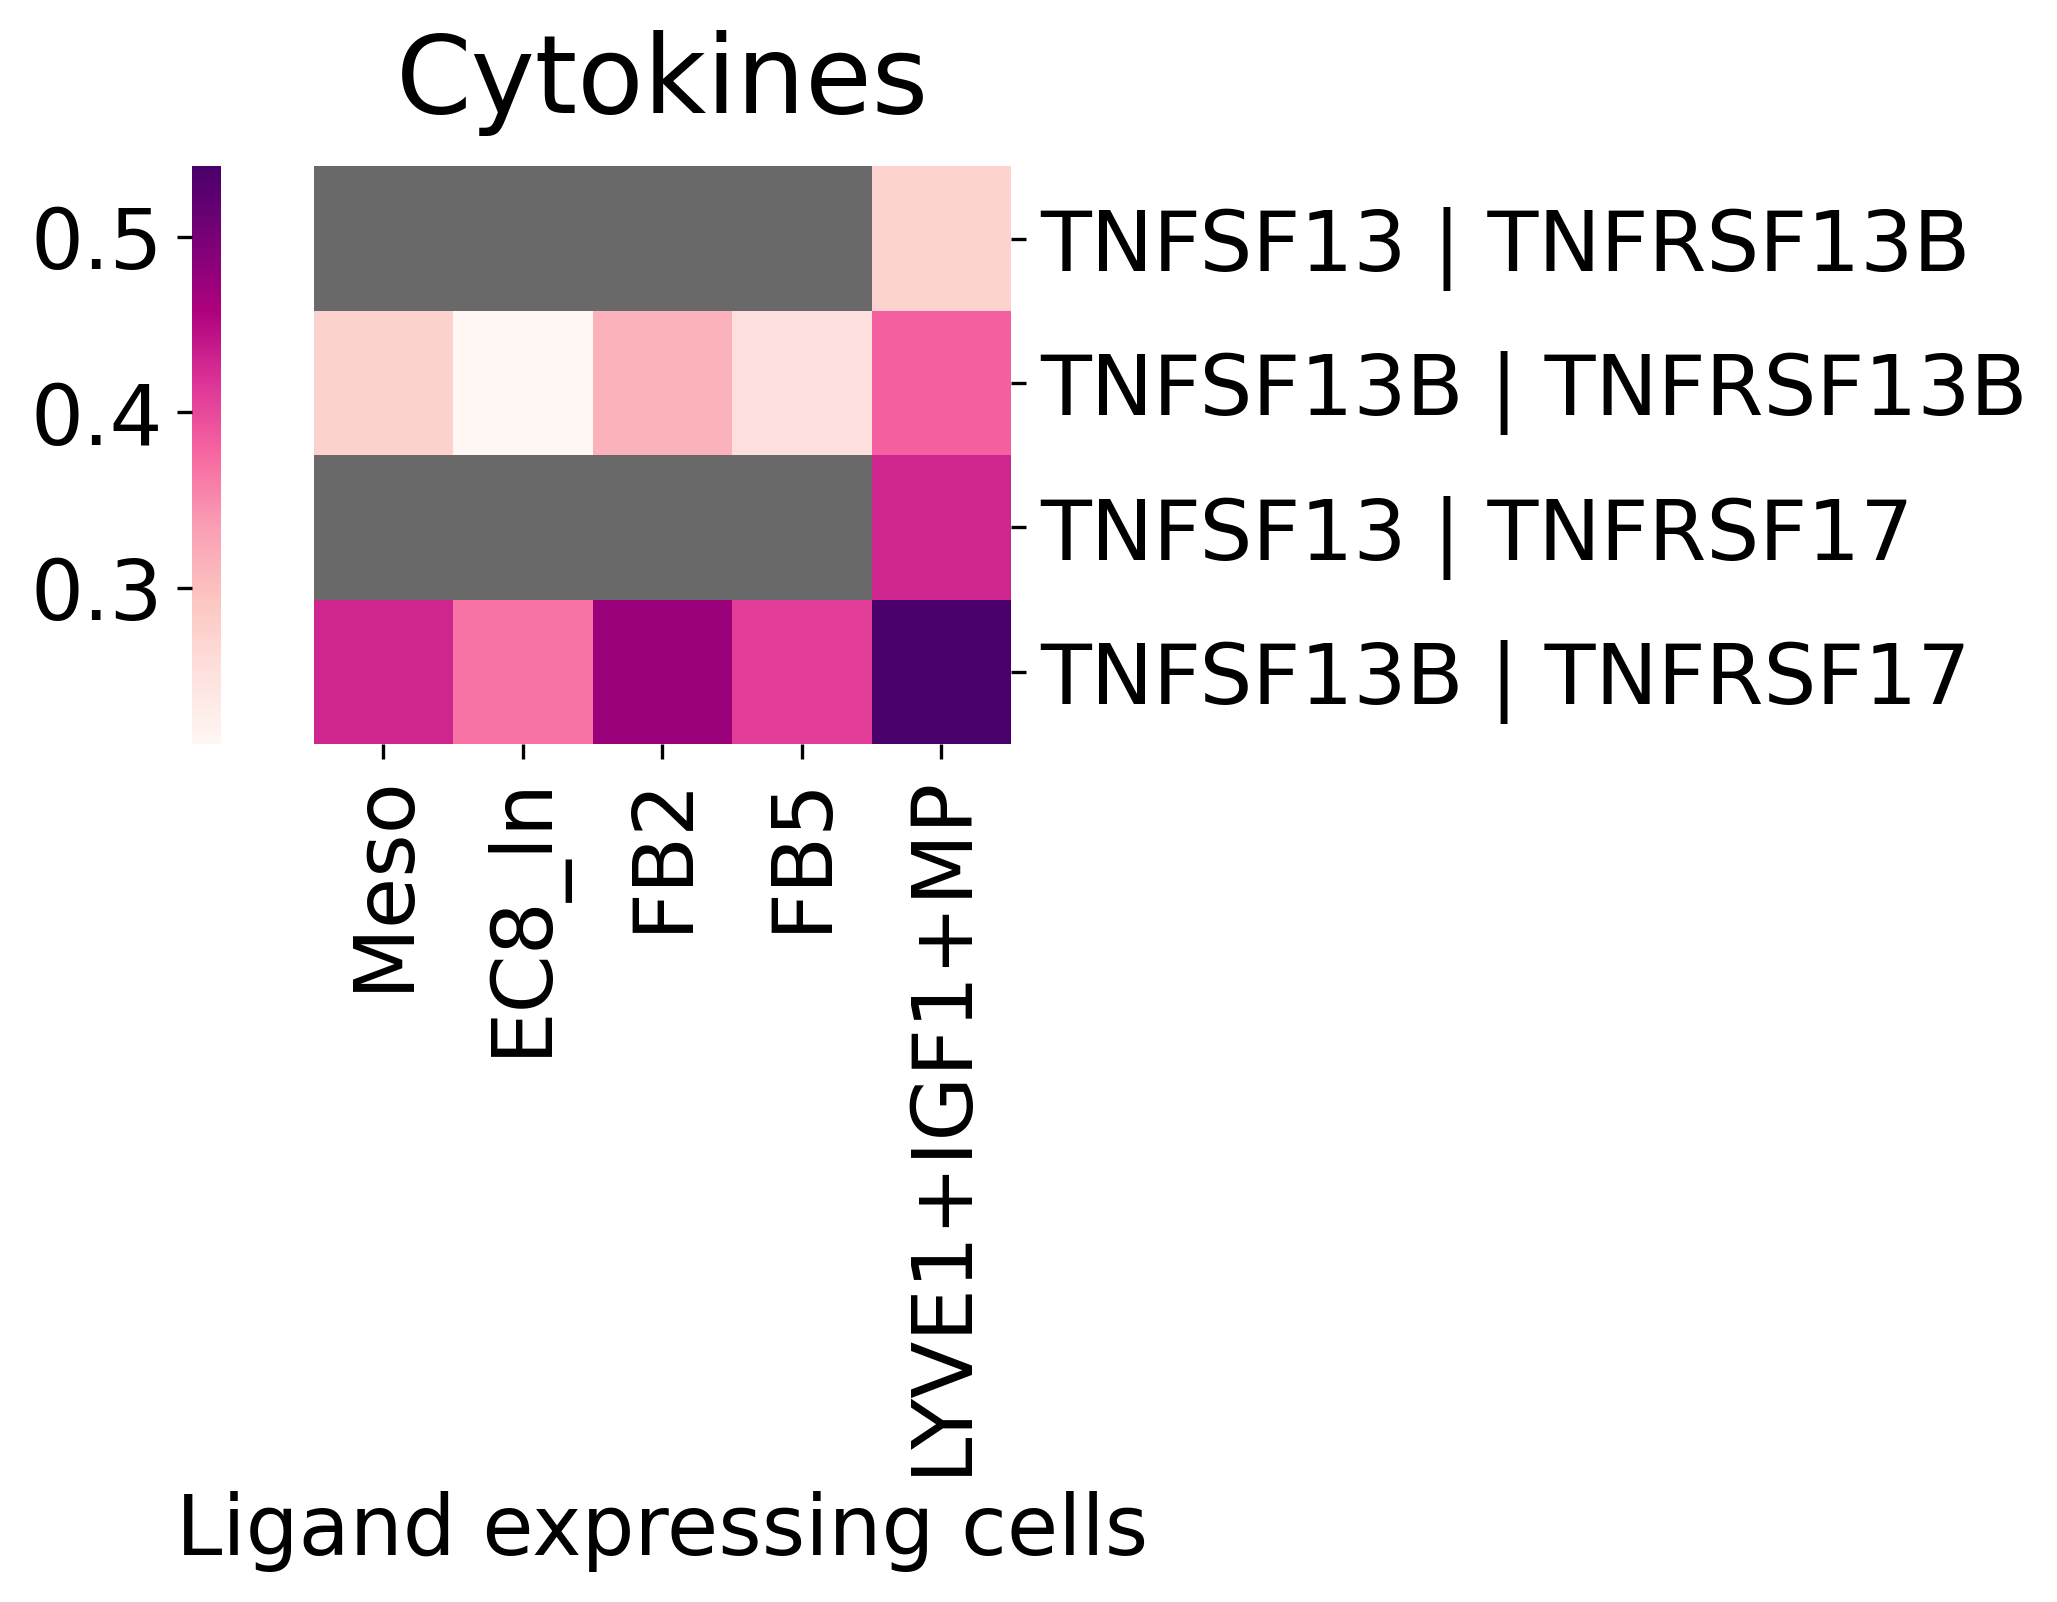

In [13]:
path_to_cpdb = '/nfs/team205/heart/cellphonedb/archive/ver20220524/RV_Bplasma-vs-allothers_Epicardium_0.05'

cpdbout_means = revise_labels(pd.read_table(f'{path_to_cpdb}/significant_means.txt',index_col=0))
cpdbout_means = cpdbout_means[cpdbout_means['interacting_pair'].isin(['CCL2_CCR10','CCL2_ACKR1', 'ACKR2_CCL2',
                                                                      'CCR2_CCL11','CCR2_CCL13','CCR2_CCL26',
                                                                      'CCL24_CCR2','CCL16_CCR2', 'CCR2_CCL7','CCR2_CCL8'])==False]
post_cpdb.plot_CCI(cpdbout_means = cpdbout_means,
         target_celltype = 'B_plasma',
         ligand_or_receptor = 'receptor',
         cpdbout_pvals = None,
         pvelue_thresh = None,
         mean_thresh = 0,
         category_column = ['is_cytokine-associated'],
         interaction_metadata = pd.read_csv('/nfs/team205/heart/custom_cellphone/interaction_meta/interaction_metadata.csv'),
         microenvcells_to_plot = ['Meso','EC6_ven', 'EC8_ln','PC2_atria',  
                                           'FB2', 'FB3','FB5', 'NC1_glial', 'LYVE1+IGF1+MP' ,'B_plasma'],
         remove_autocrine = True,
         fig_width=4,
             fig_hight=2.5,
         title='Cytokines',
         title_fontsize=26,
         title_hight=1.05
        )
plt.savefig('/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/figures/CCI_RV_Cytokine-toBplasma.pdf',
           bbox_inches='tight')